In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Funcion encargada de dibujar la cancha

In [2]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    if ax is None:
        ax = plt.gca()
        
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)
        
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [3]:
df = pd.read_csv("data_proyecto.csv",index_col=0)
df.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,,
Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
df.tail()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,,
Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,1,1999-00,5,4,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,1,1999-00,5,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,1,1999-00,28,21,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,1,1999-00,10,26,0.0,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,1,1999-00,39,7,0.0,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [5]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
df['shot_distance']

action_type
Jump Shot                             18
Jump Shot                             15
Jump Shot                             16
Jump Shot                             22
Driving Dunk Shot                      0
Jump Shot                             14
Layup Shot                             0
Jump Shot                              2
Jump Shot                             12
Running Jump Shot                     12
Jump Shot                             25
Jump Shot                             17
Running Jump Shot                     12
Jump Shot                              9
Jump Shot                              5
Jump Shot                             20
Driving Layup Shot                     0
Jump Shot                             25
Jump Shot                             16
Driving Layup Shot                     0
Jump Shot                             14
Jump Shot                             18
Running Jump Shot                     11
Running Jump Shot                     18
Runn

# Filtro de tiros que encestó

 

In [7]:
def points(shot):
    return shot


goal_df = df[df['shot_made_flag'].map(points) == 1.0]
twopts_df = goal_df[goal_df['shot_type'].map(points) == '2PT Field Goal']
threepts_df = goal_df[goal_df['shot_type'].map(points) == '3PT Field Goal']

fail_goal_df = df[df['shot_made_flag'].map(points) == 0]
fail_twopts_df = goal_df[goal_df['shot_type'].map(points) == '2PT Field Goal']
fail_threepts_df = goal_df[goal_df['shot_type'].map(points) == '3PT Field Goal']

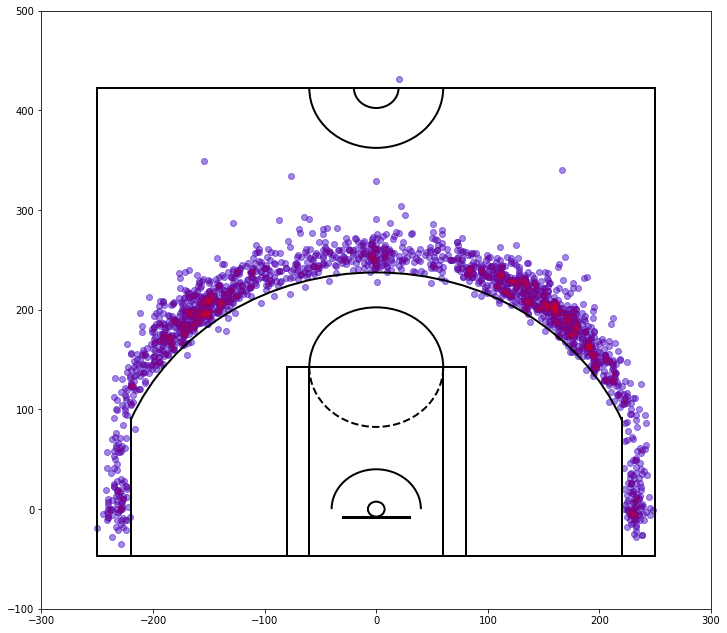

In [8]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.scatter(data=threepts_df, x=threepts_df['loc_x'], y=threepts_df['loc_y'], alpha=0.4, color='blue')
plt.scatter(data=fail_threepts_df, x=fail_threepts_df['loc_x'], y=fail_threepts_df['loc_y'], alpha=0.1, color='red')
plt.show()

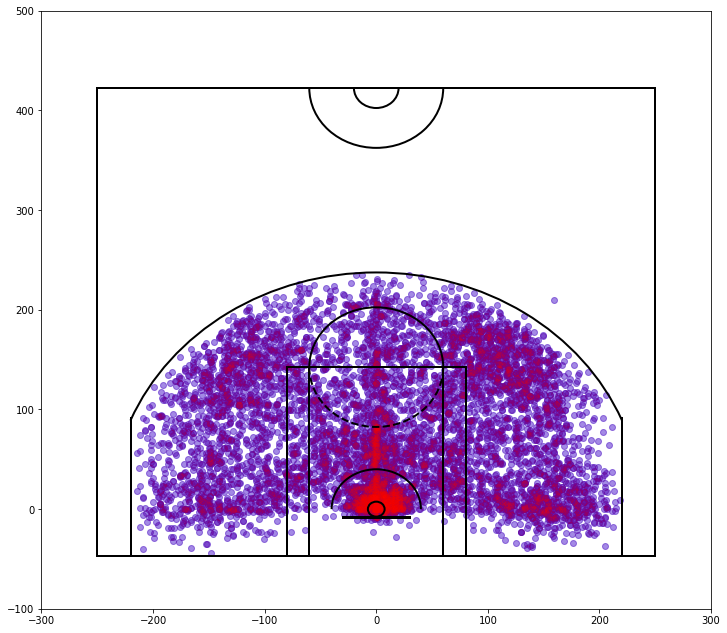

In [9]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.scatter(data=twopts_df, x=twopts_df['loc_x'], y=twopts_df['loc_y'], alpha=0.4, color='blue')
plt.scatter(data=fail_twopts_df, x=fail_twopts_df['loc_x'], y=fail_twopts_df['loc_y'], alpha=0.1, color='red')
plt.show()

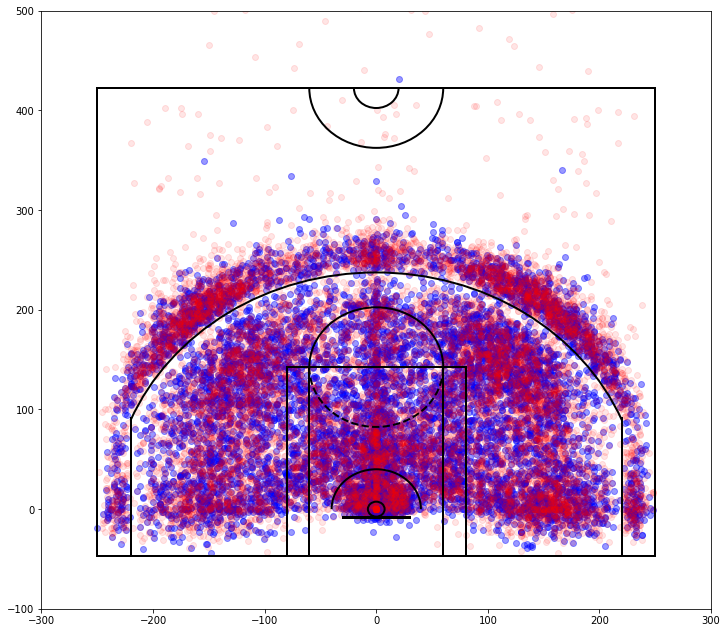

In [10]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.scatter(data=goal_df, x=goal_df['loc_x'], y=goal_df['loc_y'], alpha=0.4, color='blue')
plt.scatter(data=fail_goal_df, x=fail_goal_df['loc_x'], y=fail_goal_df['loc_y'], alpha=0.1, color='red')
plt.show()

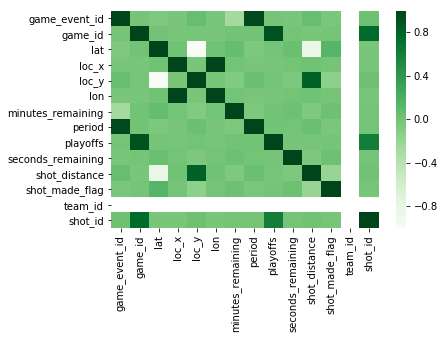

In [11]:
sns.heatmap(df.corr(), cmap="Greens")

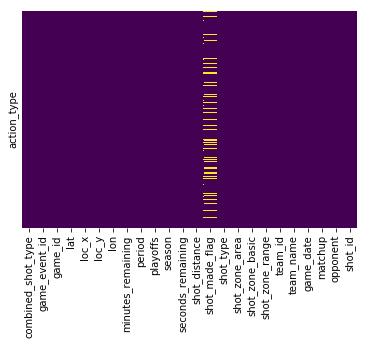

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df_prueba = df
df = df.dropna()
df.drop('team_id',axis=1,inplace=True)
df_prueba.drop('team_id',axis=1,inplace=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


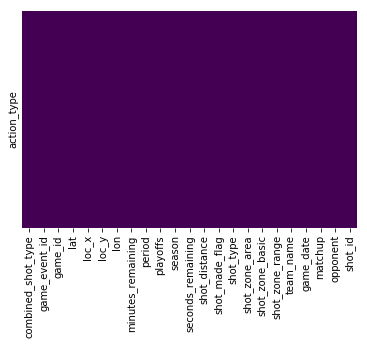

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,
Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


In [16]:
df.dtypes

combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

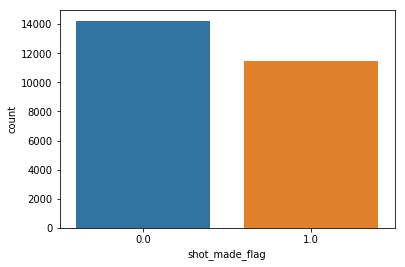

In [17]:
sns.countplot(df['shot_made_flag'])

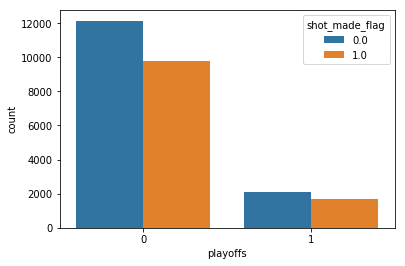

In [18]:
sns.countplot('playoffs', hue ='shot_made_flag', data=df)

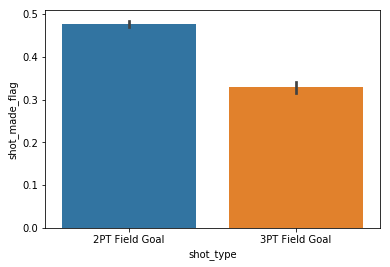

In [19]:
sns.barplot('shot_type', 'shot_made_flag', data=df)

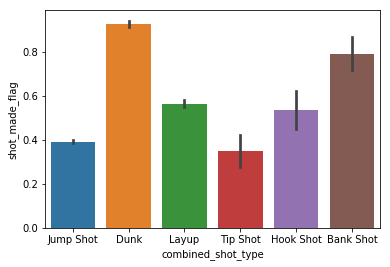

In [20]:
sns.barplot('combined_shot_type', 'shot_made_flag', data=df)

In [21]:
from sklearn.model_selection import train_test_split
X = df[['period','minutes_remaining','playoffs','shot_distance','loc_x','loc_y','lat','lon','seconds_remaining']]
y = df['shot_made_flag']
print(X)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Entrenando para el primer Modelo

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Modelo regresión logistica

In [23]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import *
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.61      0.75      0.67      4269
         1.0       0.57      0.41      0.48      3441

   micro avg       0.60      0.60      0.60      7710
   macro avg       0.59      0.58      0.57      7710
weighted avg       0.59      0.60      0.58      7710



In [24]:

print(confusion_matrix(y_test,predictions))

[[3186 1083]
 [2027 1414]]


In [25]:
print(accuracy_score(y_test,predictions))

0.5966277561608301


# Aplicación de cross-validation al Modelo

In [26]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logmodel,X,y,cv=5)
print(cv_results)
print('\n')
np.mean(cv_results)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.59338521 0.5963035  0.59525199 0.60673283 0.59194396]




C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5967234991743159

# Probando el siguiente modelo KNN

 #            Standarizar los datos

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['period','minutes_remaining','playoffs','shot_distance','loc_x','loc_y','lat','lon','seconds_remaining']])
scaled_features = scaler.transform(df[['period','minutes_remaining','playoffs','shot_distance','loc_x','loc_y','lat','lon','seconds_remaining']])

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [28]:
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4,5,6,7,8
0,-1.320593,1.481054,-0.413876,0.164339,-1.491296,-1.035246,1.035246,-1.491296,-0.360186
1,-1.320593,0.612096,-0.413876,0.270852,-0.982533,0.496228,-0.496228,-0.982533,0.952371
2,-1.320593,0.322443,-0.413876,0.909929,1.188792,0.949998,-0.949998,1.188792,1.351845
3,-0.452239,0.322443,-0.413876,-1.433353,-0.064944,-1.035246,1.035246,-0.064944,-0.531389
4,0.416115,1.191401,-0.413876,0.057826,-1.382275,-1.160033,1.160033,-1.382275,0.210491


In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_feat,y,test_size=0.30, random_state=101)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train2,y_train2)
predictions2 = knn.predict(X_test2)

In [31]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

         0.0       0.58      0.57      0.57      4296
         1.0       0.47      0.47      0.47      3414

   micro avg       0.53      0.53      0.53      7710
   macro avg       0.52      0.52      0.52      7710
weighted avg       0.53      0.53      0.53      7710



In [32]:
print(confusion_matrix(y_test2,predictions2))

[[2446 1850]
 [1794 1620]]


# Aplicando el buen amigo codo

In [33]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,y_train2)
    pred_i = knn.predict(X_test2)
    error_rate.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Error Rate')

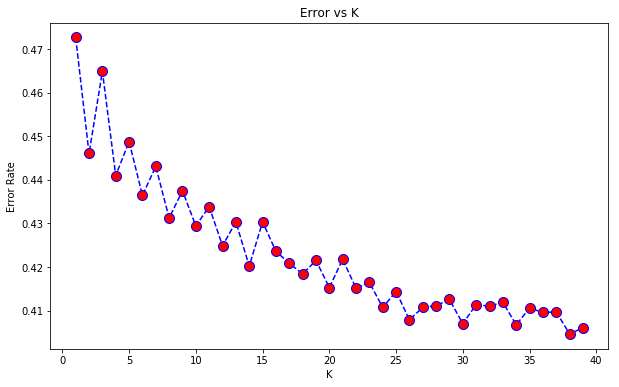

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train2,y_train2)
pred = knn.predict(X_test2)
print(confusion_matrix(y_test2,pred))
print('\n')
print(classification_report(y_test2,pred))

[[3271 1025]
 [2095 1319]]


              precision    recall  f1-score   support

         0.0       0.61      0.76      0.68      4296
         1.0       0.56      0.39      0.46      3414

   micro avg       0.60      0.60      0.60      7710
   macro avg       0.59      0.57      0.57      7710
weighted avg       0.59      0.60      0.58      7710



# Probando tercer modelo Ramdom Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30)

In [38]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train3, y_train3)
predictions3 = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test3,predictions3))

[[2509 1738]
 [1988 1475]]


In [40]:
print(classification_report(y_test3,predictions3))

              precision    recall  f1-score   support

         0.0       0.56      0.59      0.57      4247
         1.0       0.46      0.43      0.44      3463

   micro avg       0.52      0.52      0.52      7710
   macro avg       0.51      0.51      0.51      7710
weighted avg       0.51      0.52      0.51      7710



In [41]:
print(accuracy_score(y_test3,predictions3))

0.5167315175097277


# Aplicación

In [52]:
df_p = df_prueba[pd.isnull(df_prueba['shot_made_flag'].map(points))]
df_p.head()

,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,
Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,2000-01,5,2,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,0,2000-01,1,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,0,2000-01,46,0,NaN,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,0,2000-01,26,17,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33


In [53]:
X = df_p[['period','minutes_remaining','playoffs','shot_distance','loc_x','loc_y','lat','lon','seconds_remaining']]
y = df_p['shot_made_flag']

pred = logmodel.predict(X)

df_p['shot_made_flag'] = pred

df_p.head()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent,shot_id
action_type,,,,,,,,,,,,,,,,,,,,,,,
Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,0.0,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,2000-01,5,2,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,0,2000-01,1,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,0,2000-01,46,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,0,2000-01,26,17,0.0,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33


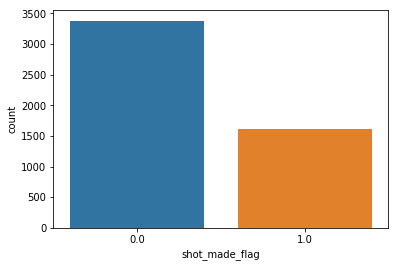

In [44]:
sns.countplot(df_p['shot_made_flag'])

In [46]:
goal_df_p = df_p[df_p['shot_made_flag'].map(points) == 1.0]
su = goal_df_p['shot_made_flag'].count()
fail = df_p[df_p['shot_made_flag'].map(points) == 0.0]
fa = fail['shot_made_flag'].count()


su_re = df[df['shot_made_flag'].map(points) == 1.0]['shot_made_flag'].count()

fa_re = df[df['shot_made_flag'].map(points) == 0]['shot_made_flag'].count()

# Datos Reales

In [50]:
print('Exito: ', su_re)
print('Falla: ', fa_re)
print('Procentaje de exito: ', ((su_re/(su_re+fa_re))*100),'%')

Exito:  11465
Falla:  14232
Procentaje de exito:  44.61610304704829 %


# Predicción

In [51]:
print('Exito: ', su)
print('Falla: ', fa)
print('Procentaje de exito: ', ((su/(su+fa))*100),'%')

Exito:  1621
Falla:  3379
Procentaje de exito:  32.42 %
